In [1]:
# Makes the display take up more of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\M323742\Anaconda3\envs\RBE595\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\M323742\Anaconda3\envs\RBE595

In [3]:
import seaborn as sns

In [4]:
seed = 7
np.random.seed(seed)

In [5]:
df = pd.read_csv("exp/sonar.csv", header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
df[df.columns[60]].value_counts()

M    111
R     97
Name: 60, dtype: int64

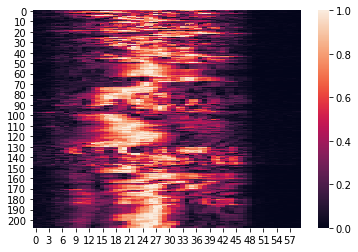

In [8]:
sns.heatmap(df[df.columns[:-1]])
plt.show()

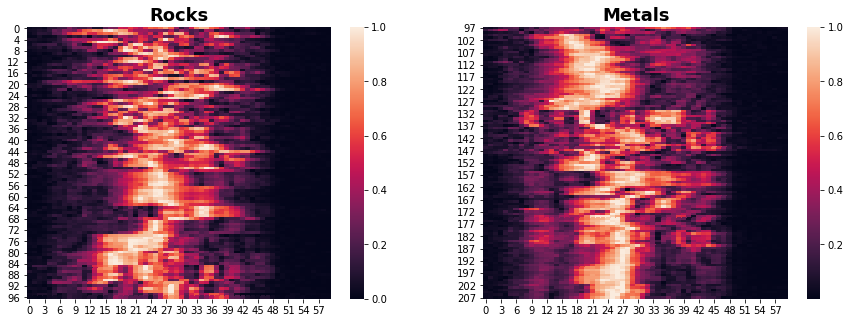

In [9]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'hspace': 0.7, 'wspace': 0.2}, figsize=(15,5))

sns.heatmap(df[df[df.columns[60]]=='R'][df.columns[:-1]], ax=axes[0])
axes[0].set_title(f'Rocks',fontsize=18, fontweight='bold')
sns.heatmap(df[df[df.columns[60]]=='M'][df.columns[:-1]], ax=axes[1])
axes[1].set_title(f'Metals',fontsize=18, fontweight='bold')
plt.show()

In [10]:
dataset = df.to_numpy()
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [11]:
# Apply Standard Scalar transforamtion on X
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [12]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)


In [13]:
txt_lst=[]

In [14]:
# Hold Learning Rate, Momentum, and Decay constant
momentum=0.9
decay=0.0
lr=0.1

# Baseline

In [15]:
# baseline
def Baseline():
    # create model
    model = Sequential()
    model.add(Dense(First_Layer, input_dim=60, init='normal', activation=activation))
    model.add(Dense(Second_Layer, init='normal', activation=activation))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Dropout Hidden

In [16]:
# dropout in hidden layers with weight constraint
def DropOut_Hidden():
    # create model
    model = Sequential()
    model.add(Dense(First_Layer, input_dim=60, init='normal', activation=activation, W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(Second_Layer, init='normal', activation=activation, W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Dropout Visible

In [17]:
# dropout in the input layer with weight constraint
def DropOut_Visible():
    # create model
    model = Sequential()
    model.add(Dropout(dropout, input_shape=(60,)))
    model.add(Dense(First_Layer, init='normal', activation=activation, W_constraint=maxnorm(3)))
    model.add(Dense(Second_Layer, init='normal', activation=activation, W_constraint=maxnorm(3)))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [18]:
def RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation):
    prop_lst=[nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation]
    print(f'nb_epoch {nb_epoch}, Dropout {dropout}, First Layer {First_Layer}, Second Layer {Second_Layer}, batch size {batch_size}, activation {activation}')
    ## BaseLine
    np.random.seed(seed)
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(build_fn=Baseline, nb_epoch=nb_epoch, batch_size=batch_size, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(y=encoded_Y, n_folds=10, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
    mean=results.mean()*100
    std=results.std()*100
    text="Baseline: %.2f%% (%.2f%%)" % (mean,std)
    print(text)
    prop_lst.append(mean)
    prop_lst.append(std)

    ## Drop Out Hidden
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(build_fn=DropOut_Hidden, nb_epoch=nb_epoch, batch_size=batch_size, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(y=encoded_Y, n_folds=10, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)

    mean=results.mean()*100
    std=results.std()*100
    text="Hidden: %.2f%% (%.2f%%)" % (mean,std)
    print(text)
    prop_lst.append(mean)
    prop_lst.append(std)


    ## Drop Out Visible
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(build_fn=DropOut_Visible, nb_epoch=nb_epoch, batch_size=batch_size, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(y=encoded_Y, n_folds=10, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)

    mean=results.mean()*100
    std=results.std()*100
    text="Visible: %.2f%% (%.2f%%)" % (mean,std)
    print(text)
    prop_lst.append(mean)
    prop_lst.append(std)
    return prop_lst

In [19]:
def GetnPlot3ModelLosses():
    '''Pipeline has no acces to losses so the model was retained using 10% as the validation set
       returns the last loss for each of the three models'''
    model1=Baseline()
    history1 =model1.fit(X_sc,encoded_Y, nb_epoch=nb_epoch, validation_split=0.1, batch_size=batch_size, verbose=0) 

    model2=DropOut_Hidden()
    history2 =model2.fit(X_sc,encoded_Y, nb_epoch=nb_epoch, validation_split=0.1, batch_size=batch_size, verbose=0) 


    model3=DropOut_Visible()
    history3 =model3.fit(X_sc,encoded_Y, nb_epoch=nb_epoch, validation_split=0.1, batch_size=batch_size, verbose=0) 



    fig, axes = plt.subplots(2, 3, gridspec_kw={'hspace': 0.3, 'wspace': 0.1}, figsize=(15,7))
    ## BASELINE RESULTS
    # summarize history for loss
    axes[0,0].plot(history1.history['loss'])
    axes[0,0].plot(history1.history['val_loss'])
    axes[0,0].set_title('model loss')
    axes[0,0].set_ylabel('loss')
    axes[0,0].set_xlabel('epoch')
    axes[0,0].legend(['train', 'test'], loc='upper left')

    # summarize history for accuracy
    axes[1,0].plot(history1.history['accuracy'])
    axes[1,0].plot(history1.history['val_accuracy'])
    axes[1,0].set_title('model accuracy')
    axes[1,0].set_ylabel('accuracy')
    axes[1,0].set_xlabel('epoch')
    axes[1,0].legend(['train', 'test'], loc='upper left')

    ## DropOut Hidden
    # summarize history for loss
    axes[0,1].plot(history2.history['loss'])
    axes[0,1].plot(history2.history['val_loss'])
    axes[0,1].set_title('model loss')
    axes[0,1].set_ylabel('loss')
    axes[0,1].set_xlabel('epoch')
    axes[0,1].legend(['train', 'test'], loc='upper left')

    # summarize history for accuracy
    axes[1,1].plot(history2.history['accuracy'])
    axes[1,1].plot(history2.history['val_accuracy'])
    axes[1,1].set_title('model accuracy')
    axes[1,1].set_ylabel('accuracy')
    axes[1,1].set_xlabel('epoch')
    axes[1,1].legend(['train', 'test'], loc='upper left')


    ## DropOut Visible
    # summarize history for loss
    axes[0,2].plot(history3.history['loss'])
    axes[0,2].plot(history3.history['val_loss'])
    axes[0,2].set_title('model loss')
    axes[0,2].set_ylabel('loss')
    axes[0,2].set_xlabel('epoch')
    axes[0,2].legend(['train', 'test'], loc='upper left')

    # summarize history for accuracy
    axes[1,2].plot(history3.history['accuracy'])
    axes[1,2].plot(history3.history['val_accuracy'])
    axes[1,2].set_title('model accuracy')
    axes[1,2].set_ylabel('accuracy')
    axes[1,2].set_xlabel('epoch')
    axes[1,2].legend(['train', 'test'], loc='upper left')

    fig.suptitle('Model Loses and accuracy',y=1.03, ha='center', fontsize=28, fontweight='bold')
    plt.figtext(0.25,  .93, f'Baseline Model', color='Black', ha='center',fontsize=12, weight='bold')
    plt.figtext(0.5,  .93, f'Dropout Hidden Model', color='Black', ha='center',fontsize=12, weight='bold')
    plt.figtext(0.75,  .93, f'Dropout Visible Model', color='Black', ha='center',fontsize=12, weight='bold')

    plt.show()

    return history1.history['loss'][-1],history2.history['loss'][-1],history3.history['loss'][-1]

## Changable Items
* Drop Out probability
* Neuron Count
* Layer Count
* Epoch Count
* Activation Function
* Batch Size

In [20]:
import warnings
warnings.filterwarnings("ignore")

nb_epoch 300, Dropout 0.2, First Layer 60, Second Layer 30, batch size 16, activation relu
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Baseline: 55.38% (5.38%)
Hidden: 55.38% (6.63%)
Visible: 53.88% (2.32%)


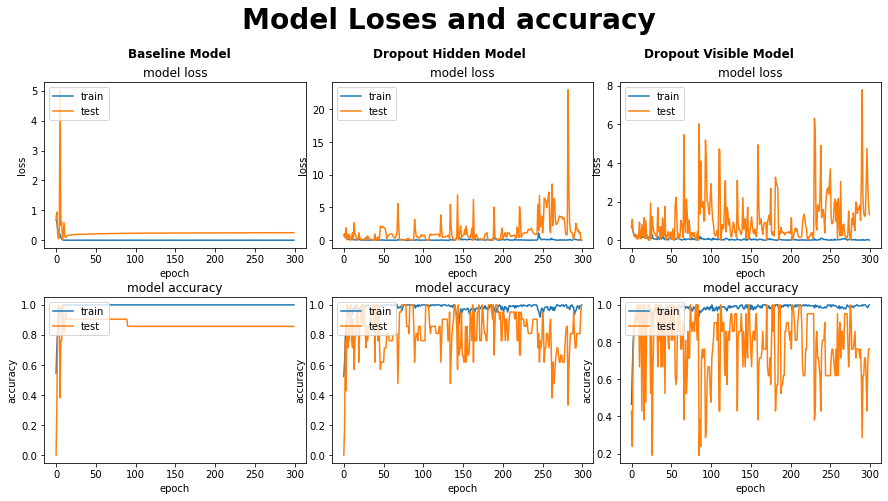

In [21]:
nb_epoch=300
dropout=0.2
First_Layer=60
Second_Layer=30
batch_size=16
activation='relu'

stats=RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation)
l1,l2,l3= GetnPlot3ModelLosses()

In [22]:
stats.append(l1)
stats.append(l2)
stats.append(l3)
statsList=[stats]

## Looking at other hyperparameters

nb_epoch 300, Dropout 0.5, First Layer 60, Second Layer 30, batch size 16, activation relu
Baseline: 55.38% (5.38%)
Hidden: 54.88% (5.16%)
Visible: 53.38% (1.23%)


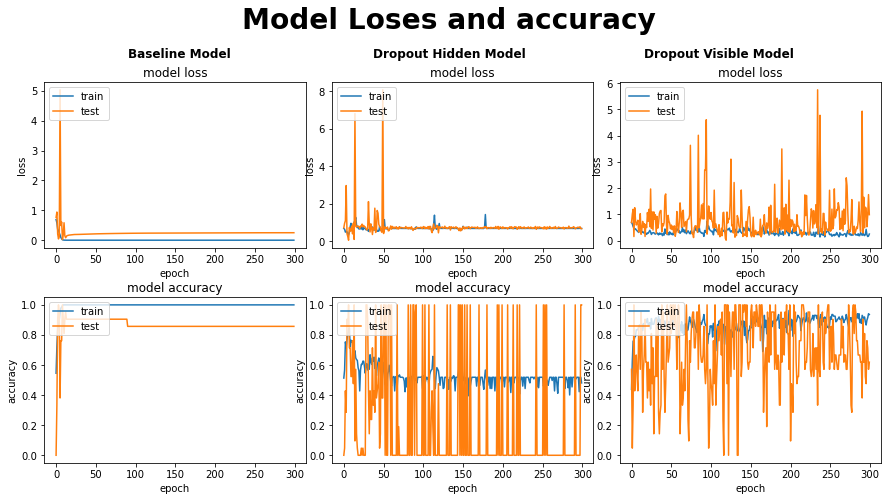

In [23]:
nb_epoch=300
dropout=0.5
First_Layer=60
Second_Layer=30
batch_size=16
activation='relu'

stats=RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation)
l1,l2,l3= GetnPlot3ModelLosses()
stats.append(l1)
stats.append(l2)
stats.append(l3)
statsList.append(stats)

nb_epoch 300, Dropout 0.2, First Layer 60, Second Layer 30, batch size 64, activation relu
Baseline: 56.89% (9.58%)
Hidden: 51.98% (5.06%)
Visible: 53.90% (3.98%)


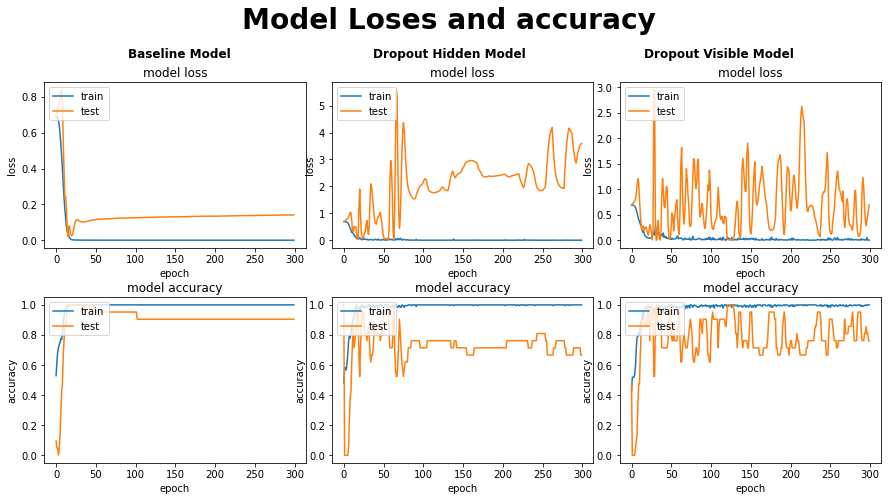

In [24]:
nb_epoch=300
dropout=0.2
First_Layer=60
Second_Layer=30
batch_size=64
activation='relu'

stats=RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation)
l1,l2,l3= GetnPlot3ModelLosses()
stats.append(l1)
stats.append(l2)
stats.append(l3)
statsList.append(stats)

nb_epoch 300, Dropout 0.2, First Layer 60, Second Layer 30, batch size 16, activation tanh
Baseline: 73.56% (4.36%)
Hidden: 72.09% (9.41%)
Visible: 73.03% (8.22%)


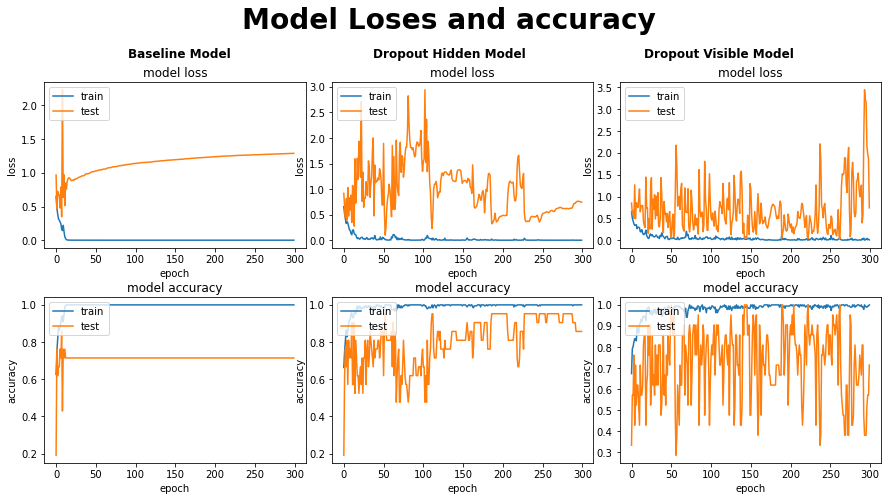

In [25]:
nb_epoch=300
dropout=0.2
First_Layer=60
Second_Layer=30
batch_size=16
activation='tanh'

stats=RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation)
l1,l2,l3= GetnPlot3ModelLosses()
stats.append(l1)
stats.append(l2)
stats.append(l3)
statsList.append(stats)

nb_epoch 300, Dropout 0.2, First Layer 120, Second Layer 30, batch size 16, activation relu
Baseline: 60.54% (9.71%)
Hidden: 57.31% (8.08%)
Visible: 56.36% (5.88%)


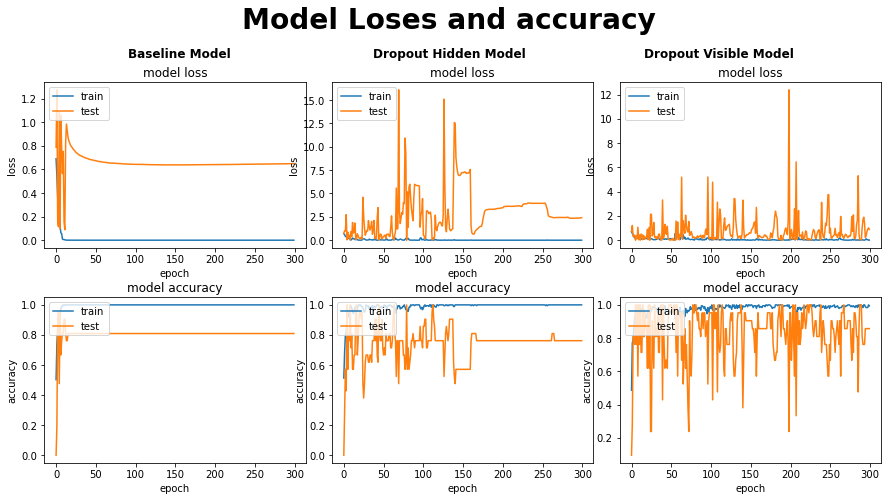

In [26]:
nb_epoch=300
dropout=0.2
First_Layer=120
Second_Layer=30
batch_size=16
activation='relu'

stats=RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation)
l1,l2,l3= GetnPlot3ModelLosses()
stats.append(l1)
stats.append(l2)
stats.append(l3)
statsList.append(stats)

nb_epoch 300, Dropout 0.2, First Layer 30, Second Layer 30, batch size 16, activation relu
Baseline: 53.38% (1.23%)
Hidden: 54.38% (3.71%)
Visible: 53.38% (1.23%)


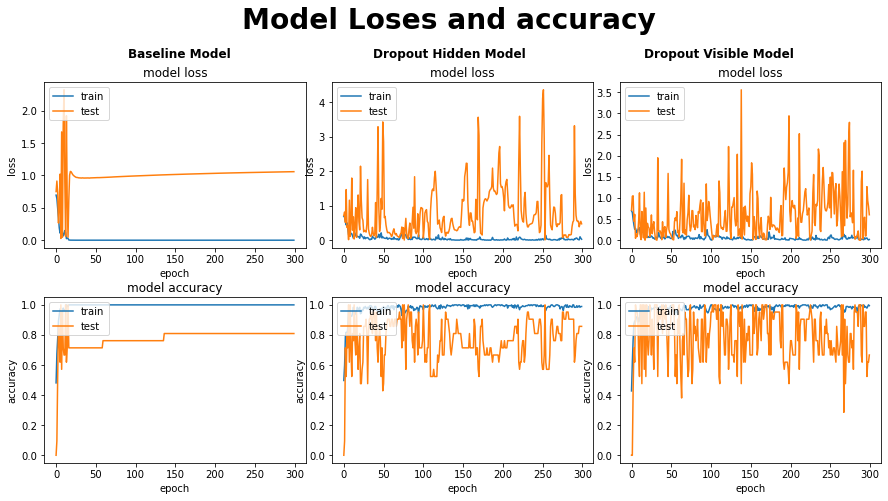

In [27]:
nb_epoch=300
dropout=0.2
First_Layer=30
Second_Layer=30
batch_size=16
activation='relu'

stats=RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation)
l1,l2,l3= GetnPlot3ModelLosses()
stats.append(l1)
stats.append(l2)
stats.append(l3)
statsList.append(stats)

nb_epoch 300, Dropout 0.2, First Layer 60, Second Layer 120, batch size 16, activation relu
Baseline: 70.61% (6.38%)
Hidden: 67.75% (9.39%)
Visible: 67.41% (7.73%)


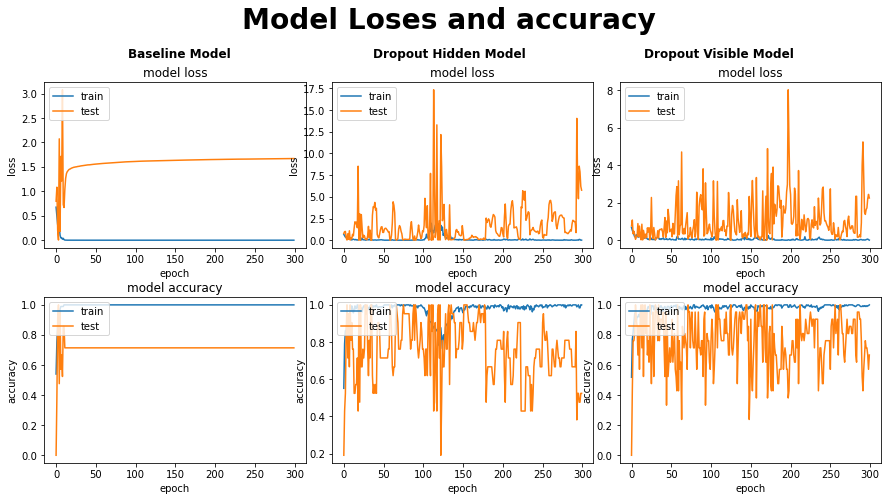

In [28]:
nb_epoch=300
dropout=0.2
First_Layer=60
Second_Layer=120
batch_size=16
activation='relu'

stats=RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation)
l1,l2,l3= GetnPlot3ModelLosses()
stats.append(l1)
stats.append(l2)
stats.append(l3)
statsList.append(stats)

nb_epoch 1500, Dropout 0.2, First Layer 60, Second Layer 30, batch size 16, activation relu
Baseline: 55.38% (5.38%)
Hidden: 55.38% (6.63%)
Visible: 53.88% (2.32%)


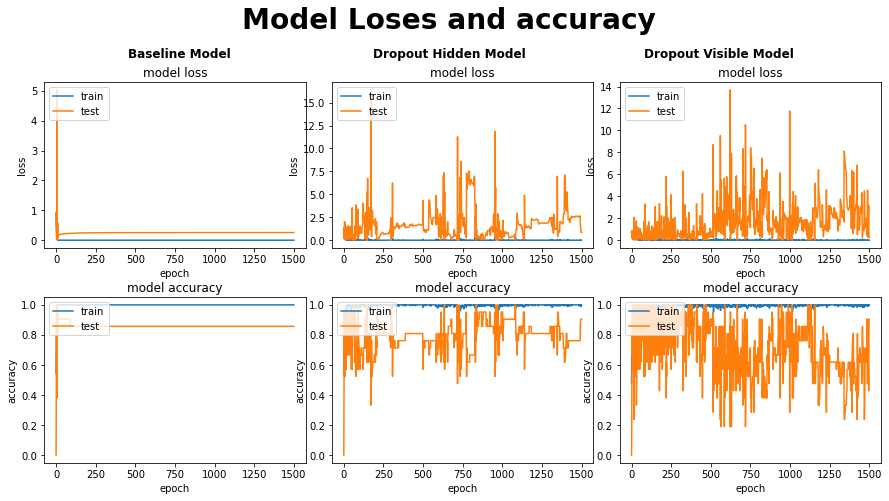

In [29]:
nb_epoch=1500
dropout=0.2
First_Layer=60
Second_Layer=30
batch_size=16
activation='relu'

stats=RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation)
l1,l2,l3= GetnPlot3ModelLosses()
stats.append(l1)
stats.append(l2)
stats.append(l3)
statsList.append(stats)

In [33]:
pd.DataFrame(statsList, columns=['Epoch','Dropout','FirstLayerCount','SecondLayerCount','BatchSize','Activation',
                                'BaselineModelMean','BaselineModelSTD',
                                 'HiddenDropoutModelMean','HiddenDropoutModelSTD',
                                'VisibleDropoutModelMean','VisibleDropoutModelSTD',
                                 'BaselineLoss','HiddenDropoutModelLoss','VisibleDropoutModelLoss']).T

,0,1,2,3,4,5,6,7
Epoch,300,300,300,300,300,300,300,1500
Dropout,0.2,0.5,0.2,0.2,0.2,0.2,0.2,0.2
FirstLayerCount,60,60,60,60,120,30,60,60
SecondLayerCount,30,30,30,30,30,30,120,30
BatchSize,16,16,64,16,16,16,16,16
Activation,relu,relu,relu,tanh,relu,relu,relu,relu
BaselineModelMean,55.3831,55.3831,56.8853,73.5606,60.539,53.3831,70.6104,55.3831
BaselineModelSTD,5.38419,5.38419,9.57908,4.36282,9.70628,1.23369,6.37813,5.38419
HiddenDropoutModelMean,55.3831,54.8831,51.9784,72.0866,57.3139,54.3831,67.7532,55.3831
HiddenDropoutModelSTD,6.63246,5.15971,5.062,9.40574,8.07518,3.70887,9.39113,6.63246


## Summary
*  0.5 drop out reduced the standard deviation of the Hidden and visble drop models 
*  Large batch size negitively impacted the model
*  tanh acivation increased accuarcy substanitally 
*  120 nerurons on the first layer increased accuarcy
*  120 nerurons on the second layer increased accuarcy
*  1500 Epochs increased accuarcy substanitally 

### Combining all the hyper parameters that postivily impacted the model

nb_epoch 1500, Dropout 0.5, First Layer 120, Second Layer 120, batch size 16, activation tanh
Baseline: 74.49% (5.86%)
Hidden: 77.87% (4.39%)
Visible: 75.87% (6.02%)


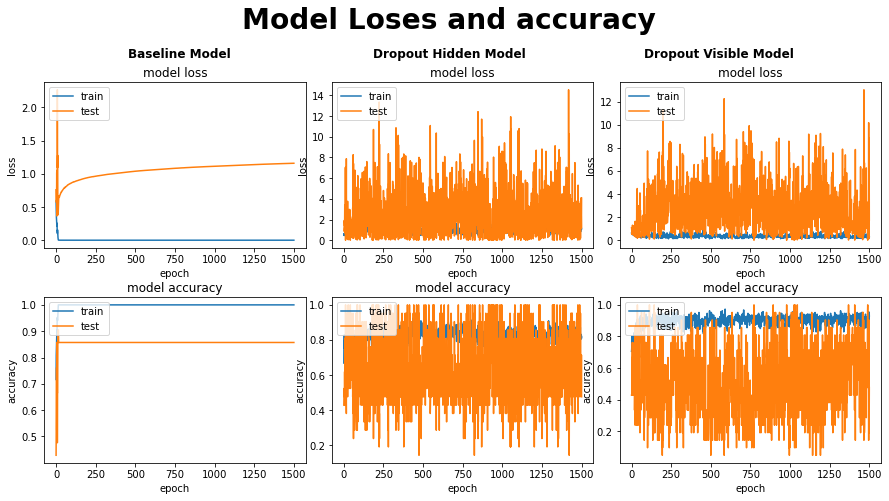

In [31]:
nb_epoch=1500
dropout=0.5
First_Layer=120
Second_Layer=120
batch_size=16
activation='tanh'

stats=RunAll3Models(nb_epoch,dropout,First_Layer,Second_Layer,batch_size,activation)
l1,l2,l3= GetnPlot3ModelLosses()
stats.append(l1)
stats.append(l2)
stats.append(l3)

In [65]:
df_combined=pd.DataFrame([stats], columns=['Epoch','Dropout','FirstLayerCount','SecondLayerCount','BatchSize','Activation',
                                'BaselineModelMean','BaselineModelSTD',
                                 'HiddenDropoutModelMean','HiddenDropoutModelSTD',
                                'VisibleDropoutModelMean','VisibleDropoutModelSTD',
                                 'BaselineLoss','HiddenDropoutModelLoss','VisibleDropoutModelLoss'])
df_combined.T

,0
Epoch,1500
Dropout,0.5
FirstLayerCount,120
SecondLayerCount,120
BatchSize,16
Activation,tanh
BaselineModelMean,74.4913
BaselineModelSTD,5.85753
HiddenDropoutModelMean,77.8723
HiddenDropoutModelSTD,4.38815


## Adding More Layers to best configuration

In [37]:
nb_epoch=1500
dropout=0.5
First_Layer=120
Second_Layer=120
Third_Layer=120
batch_size=16
activation='tanh'

In [38]:
# dropout in hidden layers 3 layes deep
def DropOut_3Hidden():
    # create model
    model = Sequential()
    model.add(Dense(First_Layer, input_dim=60, init='normal', activation=activation, W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(Second_Layer, init='normal', activation=activation, W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(Third_Layer, init='normal', activation=activation, W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [40]:
prop_lst=[nb_epoch,dropout,First_Layer,Second_Layer,Third_Layer,batch_size,activation]
print(f'nb_epoch {nb_epoch}, Dropout {dropout}, First Layer {First_Layer}, Second Layer {Second_Layer},Third Layer {Third_Layer}, batch size {batch_size}, activation {activation}')
## BaseLine
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=DropOut_3Hidden, nb_epoch=nb_epoch, batch_size=batch_size, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(y=encoded_Y, n_folds=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
mean=results.mean()*100
std=results.std()*100
text="3 Hidden: %.2f%% (%.2f%%)" % (mean,std)
print(text)
prop_lst.append(mean)
prop_lst.append(std)

nb_epoch 1500, Dropout 0.5, First Layer 120, Second Layer 120,Third Layer 120, batch size 16, activation tanh
3 Hidden: 75.44% (6.05%)


In [41]:
model=DropOut_3Hidden()
history =model.fit(X_sc,encoded_Y, nb_epoch=nb_epoch, validation_split=0.1, batch_size=batch_size, verbose=0) 

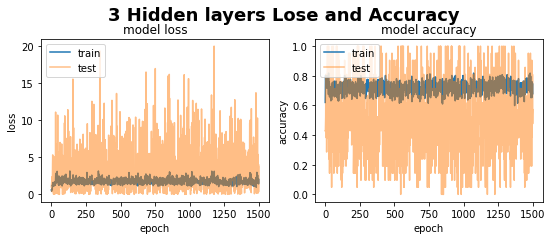

In [46]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, figsize=(9,3))
## BASELINE RESULTS
# summarize history for loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'], alpha=0.5)
axes[0].set_title('model loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

# summarize history for accuracy
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'], alpha=0.5)
axes[1].set_title('model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

fig.suptitle('3 Hidden layers Lose and Accuracy',y=1.03, ha='center', fontsize=18, fontweight='bold')
plt.show()

Extra layer did not improve the model

# Final Model

In [50]:
def BestModel():
    # create model
    model = Sequential()
    model.add(Dense(First_Layer, input_dim=60, init='normal', activation=activation, W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(Second_Layer, init='normal', activation=activation, W_constraint=maxnorm(3)))
    model.add(Dropout(dropout))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [51]:
momentum=0.9
decay=0.0
lr=0.1

nb_epoch=1500
dropout=0.5
First_Layer=120
Second_Layer=120
batch_size=16
activation='tanh'

In [67]:
df_combined[['Epoch', 'Dropout', 'FirstLayerCount', 'SecondLayerCount', 'BatchSize',
       'Activation', 'HiddenDropoutModelMean', 'HiddenDropoutModelSTD','HiddenDropoutModelLoss']].T

,0
Epoch,1500
Dropout,0.5
FirstLayerCount,120
SecondLayerCount,120
BatchSize,16
Activation,tanh
HiddenDropoutModelMean,77.8723
HiddenDropoutModelSTD,4.38815
HiddenDropoutModelLoss,1.09795


In [73]:
#df_combined[['Epoch', 'Dropout', 'FirstLayerCount', 'SecondLayerCount', 'BatchSize',
#       'Activation', 'HiddenDropoutModelMean', 'HiddenDropoutModelSTD','HiddenDropoutModelLoss']].T.to_clipboard()

In [53]:
# All in training
model=BestModel()
history =model.fit(X_sc,encoded_Y, nb_epoch=nb_epoch, batch_size=batch_size, verbose=0) 

In [54]:
print(model.summary())

Model: "sequential_321"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_982 (Dense)            (None, 120)               7320      
_________________________________________________________________
dropout_365 (Dropout)        (None, 120)               0         
_________________________________________________________________
dense_983 (Dense)            (None, 120)               14520     
_________________________________________________________________
dropout_366 (Dropout)        (None, 120)               0         
_________________________________________________________________
dense_984 (Dense)            (None, 1)                 121       
Total params: 21,961
Trainable params: 21,961
Non-trainable params: 0
_________________________________________________________________
None


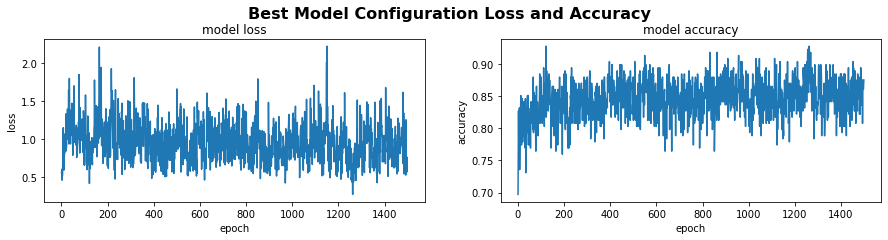

In [61]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, figsize=(15,3))
## BASELINE RESULTS
# summarize history for loss
axes[0].plot(history.history['loss'])
axes[0].set_title('model loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')


# summarize history for accuracy
axes[1].plot(history.history['accuracy'])
axes[1].set_title('model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')

fig.suptitle('Best Model Configuration Loss and Accuracy',y=1.03, ha='center', fontsize=16, fontweight='bold')
plt.show()

In [69]:
print(f"All in training final accuracy is: {history.history['accuracy'][-1]*100}%, loss: {round(history.history['loss'][-1],5)}")

All in training final accuracy is: 87.5%, loss: 0.62692


# Fin

In [71]:
# Convert jupyter notebook to python script
#!python notebook2script.py RBE595_HW3_Sonar_Dropout.ipynb

In [70]:
import gc
gc.collect()

84141

In [72]:
import datetime as dt # for date sorting
print("Finished:", dt.datetime.now())

Finished: 2020-10-18 19:14:43.556853
